<a href="https://colab.research.google.com/github/RepoRecipee/IIIT-PROJECTS-AND-LABS/blob/main/AIML_III_Module_4_Lab_2_Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [ ]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation  (ax2+bx+c)  that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [8]:
import numpy as np  # Import numpy for numerical operations

def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.
    """
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

# Generate random x values
hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]  # Coefficients for the second degree polynomial y = x^2

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

# Now you can use xs and ys, for example, to plot or analyze the data.


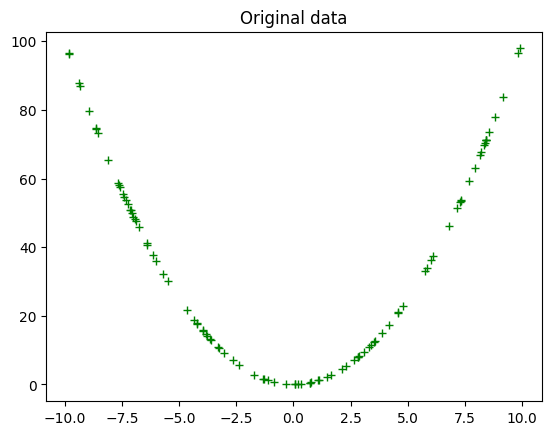

In [10]:
import matplotlib.pyplot as plt # Make sure to import matplotlib
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [12]:
import random  # Import the random module

def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

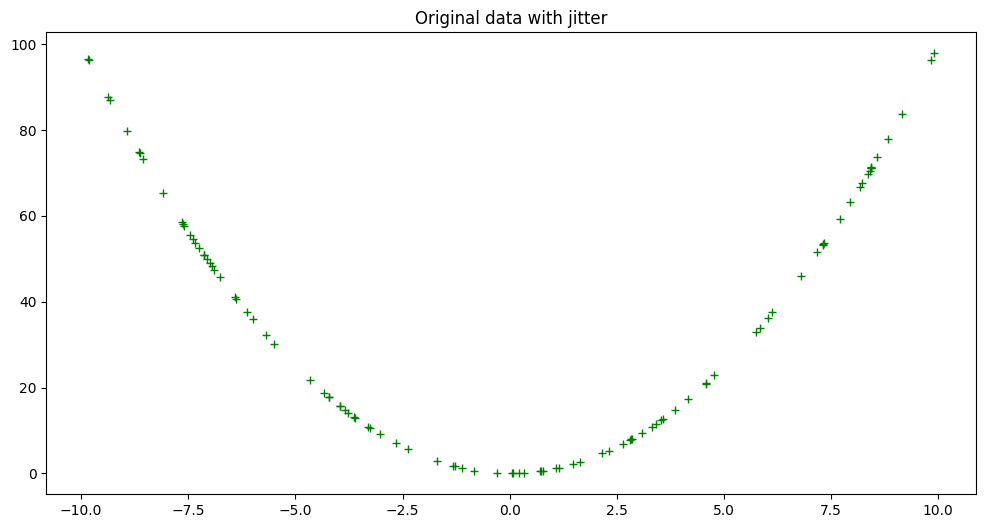

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

E=1n∑i=0n(yi−yi¯)2

In [14]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

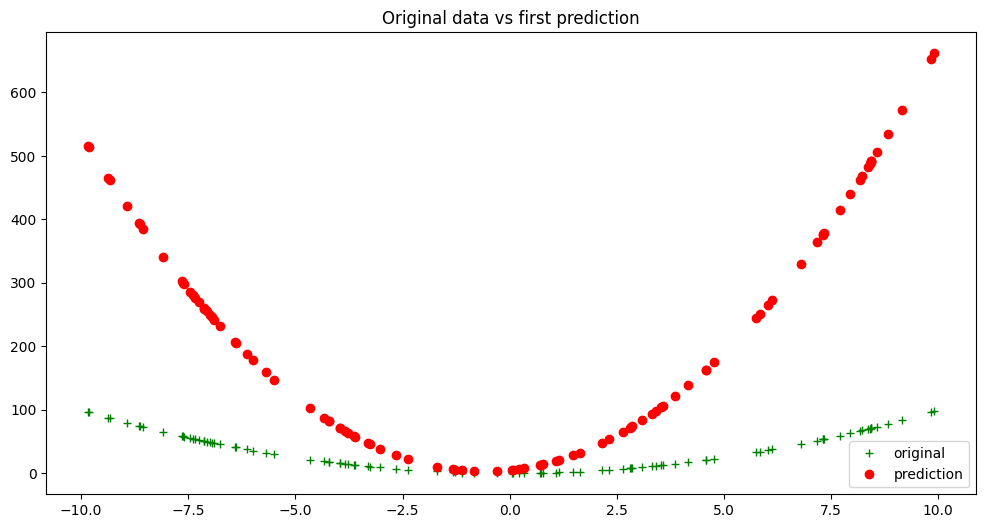

In [15]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [16]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

55130.86143802074

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [17]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [18]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (3.87667895818257, 6.967199752093233, 4.964066757500135)
Now have smaller model loss: 19542.212632585528 vs 55130.86143802074


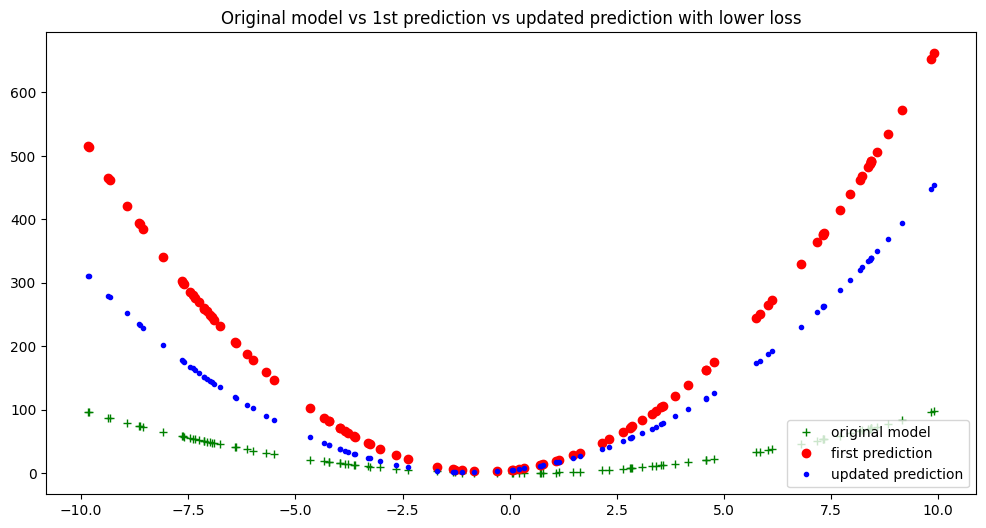

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.



In [ ]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [20]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [ ]:
GD = gradient_descent(30000, 0.0003)


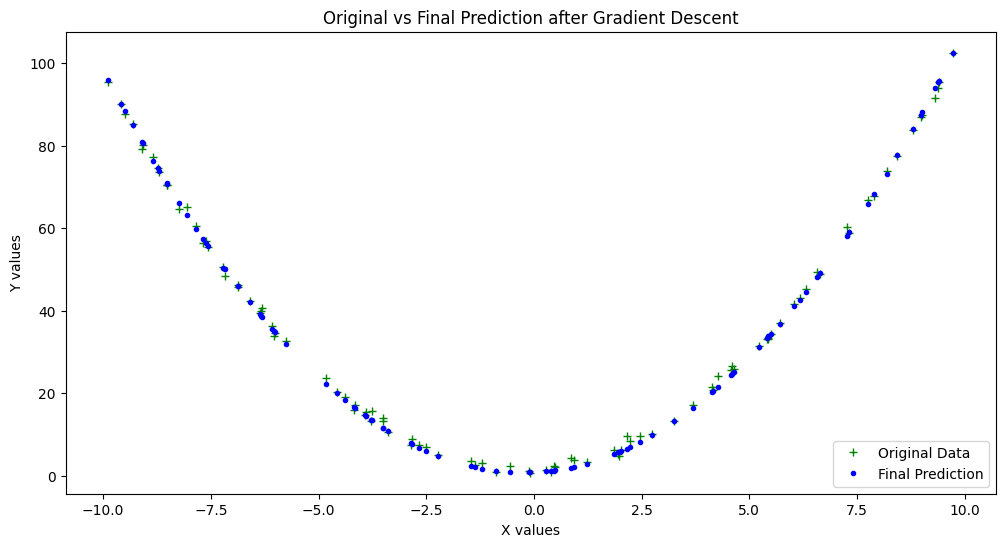

In [30]:
import matplotlib.pyplot as plt

# Generate the final predicted y values using the predicted coefficients
predicted_ys = [eval_2nd_degree(predicted_coeffs, x) for x in hundred_xs]

# Plot the original vs final predictions
plt.figure(figsize=(12,6))
plt.plot(hundred_xs, ys, 'g+', label='Original Data')  # Original data points
plt.plot(hundred_xs, predicted_ys, 'b.', label='Final Prediction')  # Predicted data points
plt.title('Original vs Final Prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()


This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients  a ,  b  and  c .

In [26]:
import numpy as np

# Define the function to evaluate the second-degree polynomial
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.
    """
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

# Generate random x values and true coefficients
np.random.seed(42)  # For reproducibility
hundred_xs = np.random.uniform(-10, 10, 100)
true_coeffs = [1, 0.5, 2]  # True coefficients for the second-degree polynomial

# Generate corresponding y values (with some noise)
ys = [eval_2nd_degree(true_coeffs, x) + np.random.normal(0, 1) for x in hundred_xs]

# Define a loss function: Mean Squared Error (MSE)
def compute_loss(coeffs, xs, ys):
    loss = 0
    for i, x in enumerate(xs):
        y_pred = eval_2nd_degree(coeffs, x)
        loss += (y_pred - ys[i]) ** 2
    return loss / len(xs)

# Gradient Descent function to minimize the loss and predict coefficients
def gradient_descent(xs, ys, learning_rate=0.001, epochs=10000):
    # Start with random initial coefficients
    coeffs = np.random.randn(3)
    m = len(xs)

    for _ in range(epochs):
        # Initialize gradients
        grad_a, grad_b, grad_c = 0, 0, 0

        # Compute gradients
        for i, x in enumerate(xs):
            y_pred = eval_2nd_degree(coeffs, x)
            error = y_pred - ys[i]
            grad_a += 2 * error * (x ** 2) / m
            grad_b += 2 * error * x / m
            grad_c += 2 * error / m

        # Update coefficients using gradients
        coeffs[0] -= learning_rate * grad_a
        coeffs[1] -= learning_rate * grad_b
        coeffs[2] -= learning_rate * grad_c

    return coeffs

# Perform Gradient Descent to predict coefficients
predicted_coeffs = gradient_descent(hundred_xs, ys, learning_rate=0.0001, epochs=10000)

# Print the final predicted coefficients and compare with original
print(f"Final Coefficients predicted: {predicted_coeffs}")
print(f"Original Coefficients: {true_coeffs}")


Final Coefficients predicted: [1.02061246 0.48174322 0.89124875]
Original Coefficients: [1, 0.5, 2]


his trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients  a ,  b  and  c .

Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


[ ]


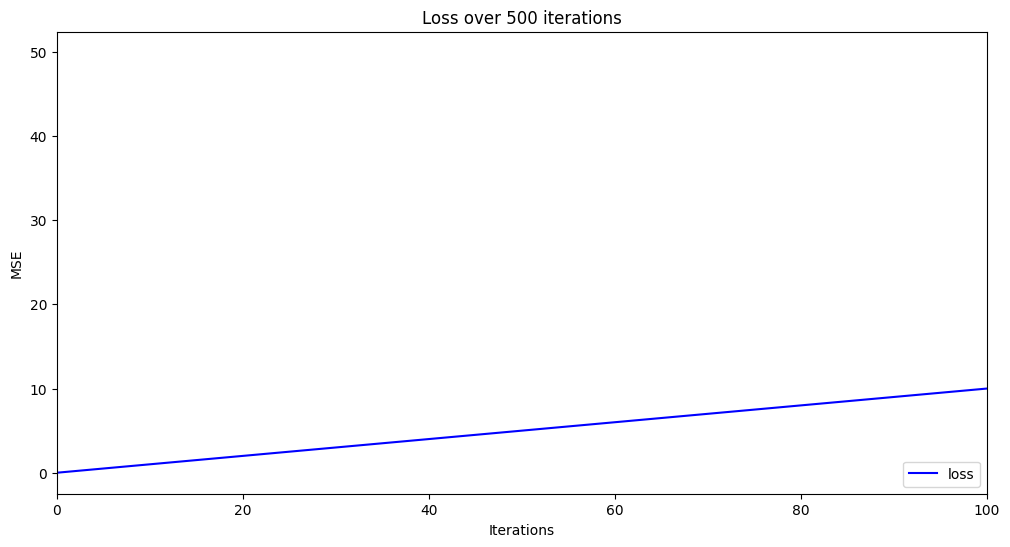

In [32]:
import matplotlib.pyplot as plt

# Example definition of GD
GD = [list(range(500)), [0.1 * i for i in range(500)]]  # Replace with your actual data

plt.figure(figsize=(12, 6))
plt.plot(GD[1], 'b-', label='loss')  # Make sure GD[1] contains the data you want to plot
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim(0, 100)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()


# Things to try
Change the coefficients array and try a different polynomial instead of our  x2 .
Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x2 ?
Can you modify the algorithm to find a maxima of a function, instead of a minima?


1. Change the Coefficients Array and Try Different Polynomials
To experiment with different polynomials, you can modify the coefficients array used in your polynomial regression model. For example, if you’re using a quadratic polynomial x^2, you can change it to a cubic polynomial x^3 or any higher degree polynomial.

Here’s a basic example using NumPy to create a polynomial of degree 3:



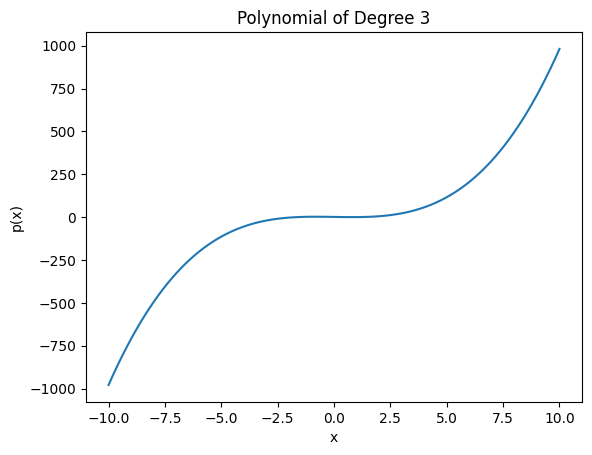

In [33]:
import numpy as np

# Define coefficients for polynomial of degree 3: p(x) = a3*x^3 + a2*x^2 + a1*x + a0
coefficients = [1, 0, -2, 1]  # This corresponds to x^3 - 2x^2 + 1

# Create a polynomial function using NumPy
polynomial = np.poly1d(coefficients)

# Generate data for plotting or testing
x = np.linspace(-10, 10, 100)
y = polynomial(x)

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.title('Polynomial of Degree 3')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()


2. Adjust Learning Rate and Observe Convergence
To observe how different learning rates affect convergence:

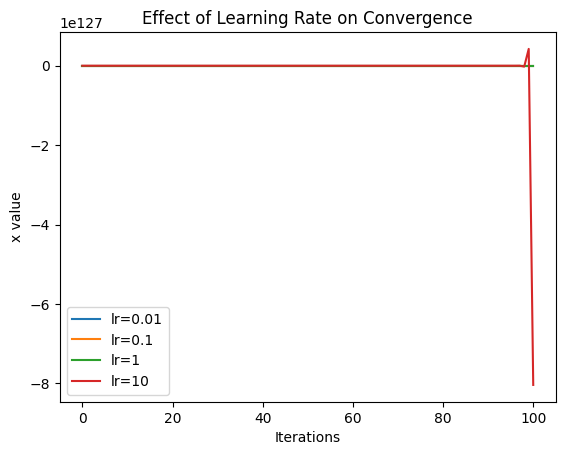

In [34]:
import numpy as np

# Define the function and its gradient
def function(x):
    return x**2

def gradient(x):
    return 2*x

# Gradient Descent function
def gradient_descent(learning_rate, iterations):
    x = np.random.randn()  # Initial point
    history = [x]
    for _ in range(iterations):
        x = x - learning_rate * gradient(x)
        history.append(x)
    return history

# Test with different learning rates
learning_rates = [0.01, 0.1, 1, 10]
iterations = 100

for lr in learning_rates:
    history = gradient_descent(lr, iterations)
    plt.plot(history, label=f'lr={lr}')

plt.title('Effect of Learning Rate on Convergence')
plt.xlabel('Iterations')
plt.ylabel('x value')
plt.legend()
plt.show()


3. Degree 5 Polynomial with Different Initializations
For a degree 5 polynomial, you can test different initializations:

/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:780: RuntimeWarning: overflow encountered in multiply
  y = y * x + pv
/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:780: RuntimeWarning: invalid value encountered in multiply
  y = y * x + pv


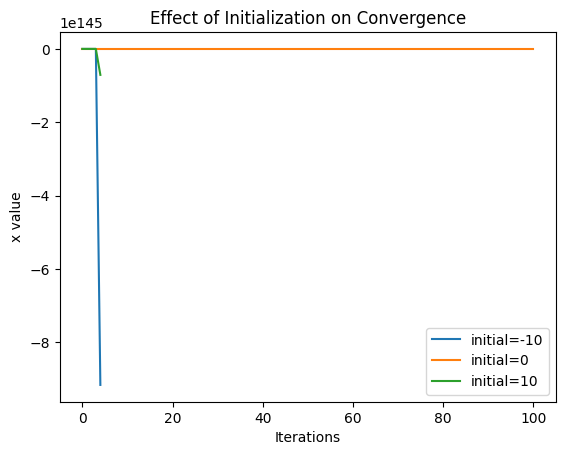

In [35]:
import numpy as np

# Define a polynomial of degree 5
coefficients = [1, 0, 0, 0, -1, 0]  # Example polynomial with 5 roots
polynomial = np.poly1d(coefficients)

# Gradient Descent function (adjusted for polynomial)
def gradient_descent_poly(learning_rate, iterations, initial_point):
    x = initial_point
    history = [x]
    for _ in range(iterations):
        grad = np.polyder(polynomial, 1)  # Derivative of polynomial
        x = x - learning_rate * grad(x)
        history.append(x)
    return history

# Test with different initial points
initial_points = [-10, 0, 10]
for point in initial_points:
    history = gradient_descent_poly(0.01, 100, point)
    plt.plot(history, label=f'initial={point}')

plt.title('Effect of Initialization on Convergence')
plt.xlabel('Iterations')
plt.ylabel('x value')
plt.legend()
plt.show()


4. Modify the Algorithm to Find a Maximum
To modify gradient descent for finding maxima, you need to change the gradient update step from minimizing to maximizing:

python

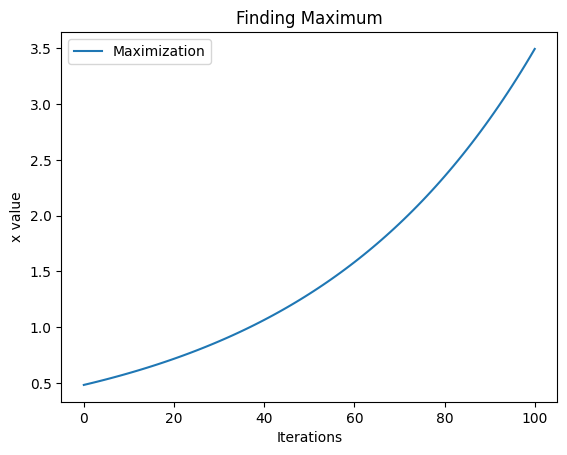

In [36]:
def gradient_descent_max(learning_rate, iterations):
    x = np.random.randn()  # Initial point
    history = [x]
    for _ in range(iterations):
        x = x + learning_rate * gradient(x)  # Change - to + for maximization
        history.append(x)
    return history

# Test for maximization
history = gradient_descent_max(0.01, 100)
plt.plot(history, label='Maximization')
plt.title('Finding Maximum')
plt.xlabel('Iterations')
plt.ylabel('x value')
plt.legend()
plt.show()
